In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

def load_data(ticker):

    filename = '../frd_complete_plus_options_sample/option_chain_' + ticker + '.csv'
    df = pd.read_csv(filename)
    df['ticker'] = ticker

    return df

ticker = 'META'
df = load_data(ticker)

In [2]:
# DTE column

df["Trade Date"] = pd.to_datetime(df["Trade Date"], errors='coerce')
df["Expiry Date"] = pd.to_datetime(df["Expiry Date"], errors='coerce')
df["DTE"] = (df["Expiry Date"] - df["Trade Date"]).dt.days

df["Spread Volatility"] = df["Bid Implied Volatility"] + df["Ask Implied Volatility"] / 2


/var/folders/hb/0dd7xx3d4mzgbx_w9m1fmb2h0000gn/T/ipykernel_2883/3643437361.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter3D(df['STrike'], df['DTE'], df['Bid Implied Volatility'], cmap='viridis')


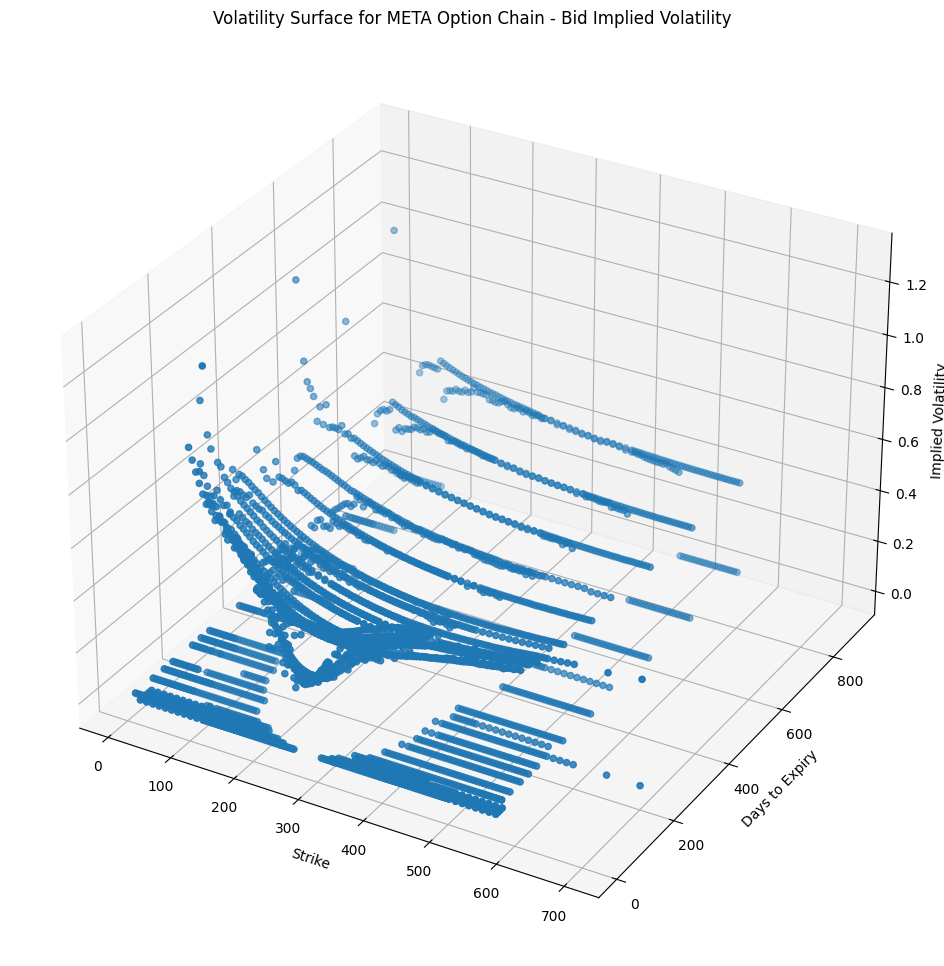

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
scatter = ax.scatter3D(df['STrike'], df['DTE'], df['Bid Implied Volatility'], cmap='viridis')
#scatter = ax.scatter3D(df['STrike'], df['DTE'], df['Bid Implied Volatility'], c=df['Bid Implied Volatility'], s=df['Volume'], cmap='viridis')

# Add labels
ax.set_xlabel('Strike')
ax.set_ylabel('Days to Expiry')
ax.set_zlabel('Implied Volatility')
ax.set_title('Volatility Surface for ' + ticker + ' Option Chain - Bid Implied Volatility')

plt.show()

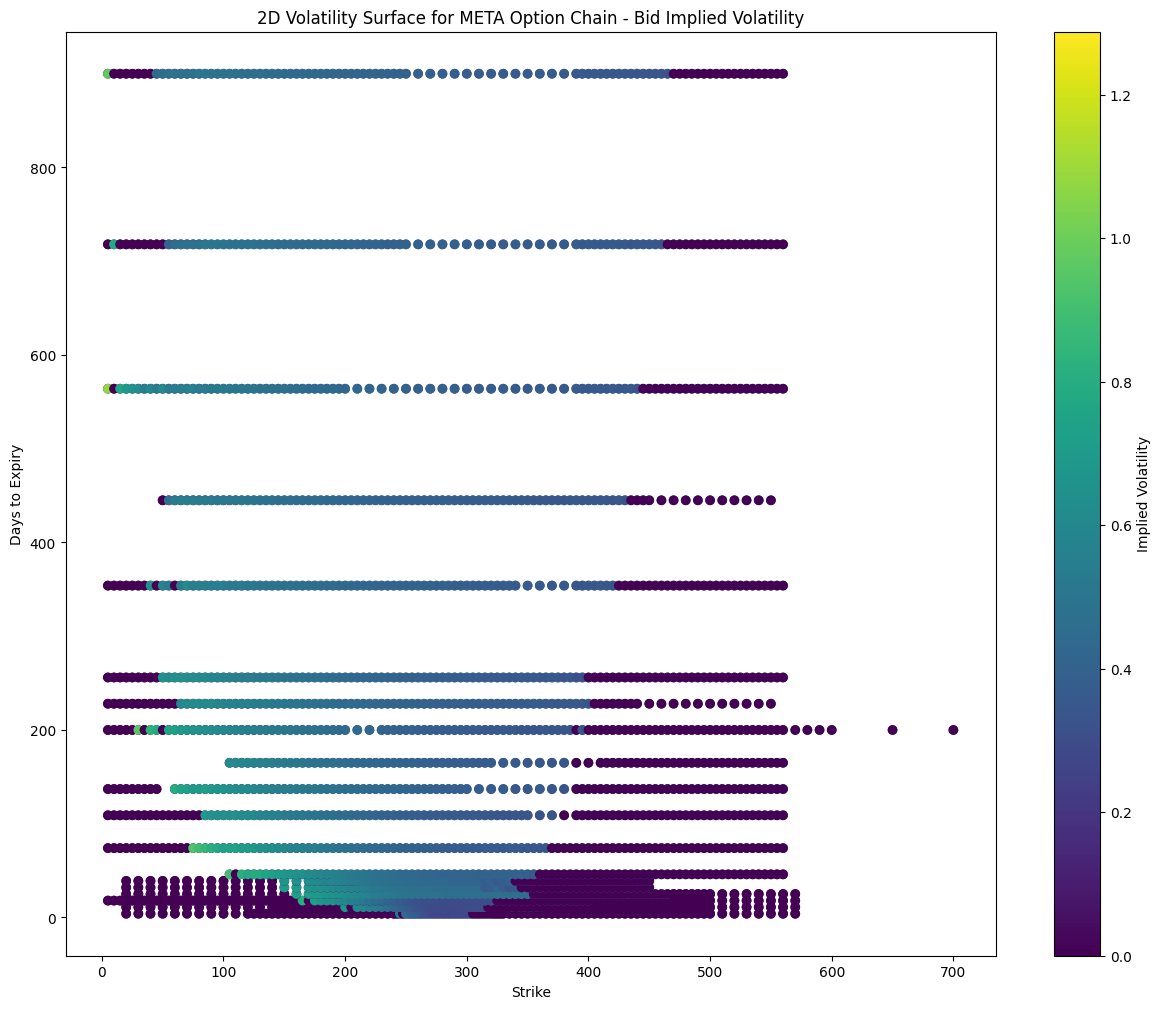

In [4]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

fig, ax = plt.subplots(figsize=(15, 12))

# Plot the scatter plot in 2D
scatter = ax.scatter(df['STrike'], df['DTE'], c=df['Bid Implied Volatility'], cmap='viridis')
#plt.yscale('log')

# Add labels
ax.set_xlabel('Strike')
ax.set_ylabel('Days to Expiry')
ax.set_title('2D Volatility Surface for ' + ticker + ' Option Chain - Bid Implied Volatility')

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, label='Implied Volatility')

plt.show()
